 <p style = "font-size: 35px;font-weight: bold;text-align:center;color:#800000"> Sentiment Analysis Pre-Post Covid Pandemic  </p>

<div>
    <img src = "http://upload.wikimedia.org/wikipedia/en/0/0c/Mu_Sigma_Logo.jpg" align="left" style="height:100px;margin-right:100px">
</div>
<div>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Ecolab.svg" align="right" style="height:40px;margin-left:100px; margin-top:25px">
</div>
 

<p style="font-size:100%;text-align:right;font-weight:bold"> Created by  : Mu Sigma team
<p style="font-size:100%;text-align:right;font-weight:bold"> Last updated by : Gourav Kumar
<p style="font-size:100%;text-align:right;font-weight:bold;"> Last edited : 03/15/2021

 <p style = "font-size: 20px;font-weight: bold;text-align: left;color:#000000"> Description:   </p>
 
This notebook is used get sentiments create a wordcloud for positive and negative sentiments. <br>
Also take reviews and start associating KPI's with those reviews, for example - Cleanliness, Hygiene .. etc.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Flair NLP

Flair is a simple to use framework for state of the art NLP. 

It provided various functionalities such as:

1. pre-trained sentiment analysis models
2. text embeddings
3. NER, POS tagging and more

Flair pretrained sentiment analysis model is trained on IMDB dataset

Link : https://www.analyticsvidhya.com/blog/2019/02/flair-nlp-library-python/

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
import itertools
from collections import Counter
import matplotlib as plt
import seaborn as sns
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.options.display.float_format = '{:.2f}'.format

os.getcwd()

'C:\\Users\\gourav.kumar'

In [3]:
from flair.models import TextClassifier
from flair.data import Sentence
from tqdm import tqdm

classifier = TextClassifier.load('en-sentiment')

2021-03-25 17:54:21,396 loading file C:\Users\gourav.kumar\.flair\models\sentiment-en-mix-distillbert_4.pt


In [4]:
# UDF (user defined function using flair nlp to calculate the sentiment scores)
def senti_score(n):
    s = Sentence(n)
    classifier.predict(s)
    total_sentiment = s.labels[0]
    assert total_sentiment.value in ['POSITIVE', 'NEGATIVE']
    sign = 1 if total_sentiment.value == 'POSITIVE' else -1
    score = total_sentiment.score
    return sign * score

In [5]:
# User defined function to tag the sentiment as positive,neutral and negative
def sentiment_type(score):
    '''
    This function is used to tag the
    review as postive or negative using
    Flair scores.

    Inputs:
    @score: Flair score

    Output:
    Sentiment type
    '''
    if score<-0.7:
        return 'Negative'
    elif score>0.7:
        return 'Positive'
    else:
        return 'Neutral'

In [6]:
# iterating the posts using for loop to calculate the sentiment scores and storing it in a list
def cal_score(text_col, rating_col):
    '''
    This function is used to calculate
    sentiment scores and create a new
    dataset with the scores for each review
    '''
    scores=[]
    for i in tqdm(text_col):
        s=senti_score(i)
        scores.append(s)

    # create a datframe with the post and sentiment score list calculated above
    df_sentiment = pd.DataFrame(
        {'Reviews': text_col,
         'Rating': rating_col,
         'flair_score': scores
        })
    df_sentiment['Sentiment_Type'] =\
    df_sentiment['flair_score'].apply(sentiment_type)

    return df_sentiment

In [7]:
def plot_count(rest_nme, df, col):
    '''
    This function is used to plot a countplot
    of the sentiments
    '''
    plt.figure(figsize = (10,10))
    plt.title(" Distribution of Sentiment in "+ rest_nme +" Reviews")
    ax=sns.countplot(col, data = df)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel(col, size=12)
    plt.ylabel('Count', size=12)
    total = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [8]:
#  Reading the dataset (raw reviews extracted from data infinity)
df_first_watch = pd.read_csv('./Raw_reviews/First_Watch.csv')
df_first_watch = df_first_watch.loc[:, ~df_first_watch.columns.str.contains('^Unnamed')]
df_first_watch = df_first_watch[df_first_watch['text'].notna()]

df_modern_market = pd.read_csv('./Raw_reviews/Modern_Market.csv')
df_modern_market = df_modern_market.loc[:, ~df_modern_market.columns.str.contains('^Unnamed')]
df_modern_market = df_modern_market[df_modern_market['text'].notna()]

df_top_golf = pd.read_csv('./Raw_reviews/Topgolf.csv')
df_top_golf = df_top_golf.loc[:, ~df_top_golf.columns.str.contains('^Unnamed')]
df_top_golf = df_top_golf[df_top_golf['text'].notna()]

df_texas_roadhouse = pd.read_csv('./Raw_reviews/Texas_Roadhouse.csv')
df_texas_roadhouse = df_texas_roadhouse.loc[:, ~df_texas_roadhouse.columns.str.contains('^Unnamed')]
df_texas_roadhouse = df_texas_roadhouse[df_texas_roadhouse['text'].notna()]

df_truefoodkitchen = pd.read_csv('./Raw_reviews/True Food Kitchen.csv')
df_truefoodkitchen = df_truefoodkitchen.loc[:, ~df_truefoodkitchen.columns.str.contains('^Unnamed')]
df_truefoodkitchen = df_truefoodkitchen[df_truefoodkitchen['text'].notna()]

In [9]:
# convert date column to datetime column 

df_first_watch['date'] = pd.to_datetime(df_first_watch['date'])
df_first_watch['Year'] = df_first_watch['date'].dt.year

df_modern_market['date'] = pd.to_datetime(df_modern_market['date'])
df_modern_market['Year'] = df_modern_market['date'].dt.year

df_top_golf['date'] = pd.to_datetime(df_top_golf['date'])
df_top_golf['Year'] = df_top_golf['date'].dt.year

df_truefoodkitchen['date'] = pd.to_datetime(df_truefoodkitchen['date'])
df_truefoodkitchen['Year'] = df_truefoodkitchen['date'].dt.year

df_texas_roadhouse['date'] = pd.to_datetime(df_texas_roadhouse['date'])
df_texas_roadhouse['Year'] = df_texas_roadhouse['date'].dt.year

In [10]:
# UDF to create pre-covid & post-covid flags 

def create_covid_flag(year):
    flag = ''
    if year < 2020:
        flag = 'Pre-covid'
    else:
        flag = 'Post-covid'
        
    return flag

df_first_watch['Covid-Flag'] = df_first_watch.apply(lambda x: create_covid_flag(x['Year']), axis=1)
df_modern_market['Covid-Flag'] = df_modern_market.apply(lambda x: create_covid_flag(x['Year']), axis=1)
df_top_golf['Covid-Flag'] = df_top_golf.apply(lambda x: create_covid_flag(x['Year']), axis=1)
df_truefoodkitchen['Covid-Flag'] = df_truefoodkitchen.apply(lambda x: create_covid_flag(x['Year']), axis=1)
df_texas_roadhouse['Covid-Flag'] = df_texas_roadhouse.apply(lambda x: create_covid_flag(x['Year']), axis=1)

In [11]:
reviews = pd.concat([df_first_watch, df_modern_market, df_top_golf, df_truefoodkitchen, df_texas_roadhouse], ignore_index=True, sort=False)
reviews.reset_index(drop=True, inplace=True)
print(reviews.shape)

(26542, 13)


In [12]:
pre_covid_reviews = reviews[reviews['Covid-Flag']=='Pre-covid']
pre_covid_reviews.reset_index(drop=True, inplace=True)

print(min(pre_covid_reviews['date']))
print(max(pre_covid_reviews['date']))

print(len(pre_covid_reviews))

2001-01-10 00:00:00+00:00
2019-12-31 00:00:00+00:00
13284


In [13]:
post_covid_reviews = reviews[reviews['Covid-Flag']=='Post-covid']
post_covid_reviews.reset_index(drop=True, inplace=True)

print(min(post_covid_reviews['date']))
print(max(post_covid_reviews['date']))

print(len(post_covid_reviews))

2020-01-01 00:00:00+00:00
2021-03-05 07:06:08.752000+00:00
13258


In [14]:
# ## first watch
# firstwatch_pre = df_first_watch[df_first_watch['Covid-Flag']=='Pre-covid']
# firstwatch_pre.reset_index(drop=True, inplace=True)
# print(firstwatch_pre.shape)

# firstwatch_post = df_first_watch[df_first_watch['Covid-Flag']=='Post-covid']
# firstwatch_post.reset_index(drop=True, inplace=True)
# print(firstwatch_post.shape)

# ## Modern Market
# modernmarket_pre = df_modern_market[df_modern_market['Covid-Flag']=='Pre-covid']
# modernmarket_pre.reset_index(drop=True, inplace=True)
# print(modernmarket_pre.shape)

# modernmarket_post = df_modern_market[df_modern_market['Covid-Flag']=='Post-covid']
# modernmarket_post.reset_index(drop=True, inplace=True)
# print(modernmarket_post.shape)

# ## Top Golf
# topgolf_pre = df_top_golf[df_top_golf['Covid-Flag']=='Pre-covid']
# topgolf_pre.reset_index(drop=True, inplace=True)
# print(topgolf_pre.shape)

# topgolf_post = df_top_golf[df_top_golf['Covid-Flag']=='Post-covid']
# topgolf_post.reset_index(drop=True, inplace=True)
# print(topgolf_post.shape)

# ## True Food Kitchen
# truefoodkitchen_pre = df_truefoodkitchen[df_truefoodkitchen['Covid-Flag']=='Pre-covid']
# truefoodkitchen_pre.reset_index(drop=True, inplace=True)
# print(firstwatch_pre.shape)

# truefoodkitchen_post = df_truefoodkitchen[df_truefoodkitchen['Covid-Flag']=='Post-covid']
# truefoodkitchen_post.reset_index(drop=True, inplace=True)
# print(truefoodkitchen_post.shape)

# ## Texas Roadhouse
# texasroadhouse_pre = df_texas_roadhouse[df_texas_roadhouse['Covid-Flag']=='Pre-covid']
# texasroadhouse_pre.reset_index(drop=True, inplace=True)
# print(texasroadhouse_pre.shape)

# texasroadhouse_post = df_texas_roadhouse[df_texas_roadhouse['Covid-Flag']=='Post-covid']
# texasroadhouse_post.reset_index(drop=True, inplace=True)
# print(texasroadhouse_post.shape)

In [15]:
# # Getting only the text column
# text_col_frst_wtch = firstwatch_pre["text"].to_list()
# rating_col_frst_wtch = firstwatch_pre['rating'].to_list()
# firstwatch_pre_sentiment = cal_score(text_col_frst_wtch, rating_col_frst_wtch)

# # Getting only the text column
# text_col_frst_wtch = firstwatch_post["text"].to_list()
# rating_col_frst_wtch = firstwatch_post['rating'].to_list()
# firstwatch_post_sentiment = cal_score(text_col_frst_wtch, rating_col_frst_wtch)

# # Getting only the text column
# text_col_mrdn_mrkt = modernmarket_pre["text"].to_list()
# rating_col_mrdn_mrkt = modernmarket_pre['rating'].to_list()
# modernmarket_pre_sentiment = cal_score(text_col_mrdn_mrkt, rating_col_mrdn_mrkt)

# # Getting only the text column
# text_col_mrdn_mrkt = modernmarket_post["text"].to_list()
# rating_col_mrdn_mrkt = modernmarket_post['rating'].to_list()
# modernmarket_post_sentiment = cal_score(text_col_mrdn_mrkt, rating_col_mrdn_mrkt)

# # Getting only the text column
# text_col_top_golf = topgolf_pre["text"].to_list()
# rating_col_top_golf  = topgolf_pre['rating'].to_list()
# topgolf_pre_sentiment = cal_score(text_col_top_golf, rating_col_top_golf)

# # Getting only the text column
# text_col_top_golf = topgolf_post["text"].to_list()
# rating_col_top_golf  = topgolf_post['rating'].to_list()
# topgolf_post_sentiment = cal_score(text_col_top_golf, rating_col_top_golf)

# # Getting only the text column
# text_col_truefoodkitchen = truefoodkitchen_pre["text"].to_list()
# rating_col_truefoodkitchen  = truefoodkitchen_pre['rating'].to_list()
# truefoodkitchen_pre_sentiment = cal_score(text_col_truefoodkitchen, rating_col_truefoodkitchen)

# # Getting only the text column
# text_col_truefoodkitchen = truefoodkitchen_post["text"].to_list()
# rating_col_truefoodkitchen  = truefoodkitchen_post['rating'].to_list()
# truefoodkitchen_post_sentiment = cal_score(text_col_truefoodkitchen, rating_col_truefoodkitchen)

# # Getting only the text column
# text_col_texasroadhouse = texasroadhouse_pre["text"].to_list()
# rating_col_texasroadhouse   = texasroadhouse_pre['rating'].to_list()
# texasroadhouse_pre_sentiment = cal_score(text_col_texasroadhouse, rating_col_texasroadhouse)

# # Getting only the text column
# text_col_texasroadhouse = texasroadhouse_post["text"].to_list()
# rating_col_texasroadhouse   = texasroadhouse_post['rating'].to_list()
# texasroadhouse_post_sentiment = cal_score(text_col_texasroadhouse, rating_col_texasroadhouse)

In [16]:
# firstwatch_pre_sentiment.to_csv('./Sentiment/firstwatch_pre_sentiment.csv')
# firstwatch_post_sentiment.to_csv('./Sentiment/firstwatch_post_sentiment.csv')
# modernmarket_pre_sentiment.to_csv('./Sentiment/modernmarket_pre_sentiment.csv')
# modernmarket_post_sentiment.to_csv('./Sentiment/modernmarket_post_sentiment.csv')
# topgolf_pre_sentiment.to_csv('./Sentiment/topgolf_pre_sentiment.csv')
# topgolf_post_sentiment.to_csv('./Sentiment/topgolf_post_sentiment.csv')
# truefoodkitchen_pre_sentiment.to_csv('./Sentiment/truefoodkitchen_pre_sentiment.csv')
# truefoodkitchen_post_sentiment.to_csv('./Sentiment/truefoodkitchen_post_sentiment.csv')
# texasroadhouse_pre_sentiment.to_csv('./Sentiment/texasroadhouse_pre_sentiment.csv')
# texasroadhouse_post_sentiment.to_csv('./Sentiment/texasroadhouse_post_sentiment.csv')

In [81]:
firstwatch_pre_sentiment = pd.read_csv('./Sentiment/firstwatch_pre_sentiment.csv')
firstwatch_post_sentiment = pd.read_csv('./Sentiment/firstwatch_post_sentiment.csv')
modernmarket_pre_sentiment = pd.read_csv('./Sentiment/modernmarket_pre_sentiment.csv')
modernmarket_post_sentiment = pd.read_csv('./Sentiment/modernmarket_post_sentiment.csv')
topgolf_pre_sentiment = pd.read_csv('./Sentiment/topgolf_pre_sentiment.csv')
topgolf_post_sentiment = pd.read_csv('./Sentiment/topgolf_post_sentiment.csv')
truefoodkitchen_pre_sentiment = pd.read_csv('./Sentiment/truefoodkitchen_pre_sentiment.csv')
truefoodkitchen_post_sentiment = pd.read_csv('./Sentiment/truefoodkitchen_post_sentiment.csv')
texasroadhouse_pre_sentiment = pd.read_csv('./Sentiment/texasroadhouse_pre_sentiment.csv')
texasroadhouse_post_sentiment = pd.read_csv('./Sentiment/texasroadhouse_post_sentiment.csv')

In [82]:
print("{} % of Positive Sentiment for Pre-Covid First Watch".format(round((len(firstwatch_pre_sentiment[firstwatch_pre_sentiment.Sentiment_Type == 'Positive'])/len(firstwatch_pre_sentiment)*100), 2)))
print("{} % of Negative Sentiment for Pre-Covid First Watch".format(round((len(firstwatch_pre_sentiment[firstwatch_pre_sentiment.Sentiment_Type == 'Negative'])/len(firstwatch_pre_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Pre-Covid First Watch".format(round((len(firstwatch_pre_sentiment[firstwatch_pre_sentiment.Sentiment_Type == 'Neutral'])/len(firstwatch_pre_sentiment)*100), 2)))

75.46 % of Positive Sentiment for Pre-Covid First Watch
21.67 % of Negative Sentiment for Pre-Covid First Watch
2.87 % of Neutral Sentiment for Pre-Covid First Watch


In [83]:
print("{} % of Positive Sentiment for Post-Covid First Watch".format(round((len(firstwatch_post_sentiment[firstwatch_post_sentiment.Sentiment_Type == 'Positive'])/len(firstwatch_post_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Post-Covid First Watch".format(round((len(firstwatch_post_sentiment[firstwatch_post_sentiment.Sentiment_Type == 'Negative'])/len(firstwatch_post_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Post-Covid First Watch".format(round((len(firstwatch_post_sentiment[firstwatch_post_sentiment.Sentiment_Type == 'Neutral'])/len(firstwatch_post_sentiment)*100), 2)))

65.96 % of Positive Sentiment for Post-Covid First Watch
30.85 % of Negative Sentiment for Post-Covid First Watch
3.19 % of Neutral Sentiment for Post-Covid First Watch


In [84]:
print("{} % of Positive Sentiment for Pre-Covid Modern Market".format(round((len(modernmarket_pre_sentiment[modernmarket_pre_sentiment.Sentiment_Type == 'Positive'])/len(modernmarket_pre_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Pre-Covid Modern Market".format(round((len(modernmarket_pre_sentiment[modernmarket_pre_sentiment.Sentiment_Type == 'Negative'])/len(modernmarket_pre_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Pre-Covid Modern Market".format(round((len(modernmarket_pre_sentiment[modernmarket_pre_sentiment.Sentiment_Type == 'Neutral'])/len(modernmarket_pre_sentiment)*100), 2)))

79.34 % of Positive Sentiment for Pre-Covid Modern Market
17.61 % of Negative Sentiment for Pre-Covid Modern Market
3.05 % of Neutral Sentiment for Pre-Covid Modern Market


In [85]:
print("{} % of Positive Sentiment for Post-Covid Modern Market".format(round((len(modernmarket_post_sentiment[modernmarket_post_sentiment.Sentiment_Type == 'Positive'])/len(modernmarket_post_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Post-Covid Modern Market".format(round((len(modernmarket_post_sentiment[modernmarket_post_sentiment.Sentiment_Type == 'Negative'])/len(modernmarket_post_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Post-Covid Modern Market".format(round((len(modernmarket_post_sentiment[modernmarket_post_sentiment.Sentiment_Type == 'Neutral'])/len(modernmarket_post_sentiment)*100), 2)))

60.27 % of Positive Sentiment for Post-Covid Modern Market
35.62 % of Negative Sentiment for Post-Covid Modern Market
4.11 % of Neutral Sentiment for Post-Covid Modern Market


In [86]:
print("{} % of Positive Sentiment for Pre-Covid Top Golf".format(round((len(topgolf_pre_sentiment[topgolf_pre_sentiment.Sentiment_Type == 'Positive'])/len(topgolf_pre_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Pre-Covid Top Golf".format(round((len(topgolf_pre_sentiment[topgolf_pre_sentiment.Sentiment_Type == 'Negative'])/len(topgolf_pre_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Pre-Covid Top Golf".format(round((len(topgolf_pre_sentiment[topgolf_pre_sentiment.Sentiment_Type == 'Neutral'])/len(topgolf_pre_sentiment)*100), 2)))

75.42 % of Positive Sentiment for Pre-Covid Top Golf
19.89 % of Negative Sentiment for Pre-Covid Top Golf
4.69 % of Neutral Sentiment for Pre-Covid Top Golf


In [87]:
print("{} % of Positive Sentiment for Post-Covid Top Golf".format(round((len(topgolf_post_sentiment[topgolf_post_sentiment.Sentiment_Type == 'Positive'])/len(topgolf_post_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Post-Covid Top Golf".format(round((len(topgolf_post_sentiment[topgolf_post_sentiment.Sentiment_Type == 'Negative'])/len(topgolf_post_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Post-Covid Top Golf".format(round((len(topgolf_post_sentiment[topgolf_post_sentiment.Sentiment_Type == 'Neutral'])/len(topgolf_post_sentiment)*100), 2)))

67.46 % of Positive Sentiment for Post-Covid Top Golf
29.59 % of Negative Sentiment for Post-Covid Top Golf
2.96 % of Neutral Sentiment for Post-Covid Top Golf


In [88]:
print("{} % of Positive Sentiment for Pre-Covid True Food Kitchen".format(round((len(truefoodkitchen_pre_sentiment[truefoodkitchen_pre_sentiment.Sentiment_Type == 'Positive'])/len(truefoodkitchen_pre_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Pre-Covid True Food Kitchen".format(round((len(truefoodkitchen_pre_sentiment[truefoodkitchen_pre_sentiment.Sentiment_Type == 'Negative'])/len(truefoodkitchen_pre_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Pre-Covid True Food Kitchen".format(round((len(truefoodkitchen_pre_sentiment[truefoodkitchen_pre_sentiment.Sentiment_Type == 'Neutral'])/len(truefoodkitchen_pre_sentiment)*100), 2)))

75.95 % of Positive Sentiment for Pre-Covid True Food Kitchen
22.27 % of Negative Sentiment for Pre-Covid True Food Kitchen
1.78 % of Neutral Sentiment for Pre-Covid True Food Kitchen


In [89]:
print("{} % of Positive Sentiment for Post-Covid True Food Kitchen".format(round((len(truefoodkitchen_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type == 'Positive'])/len(truefoodkitchen_post_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Post-Covid True Food Kitchen".format(round((len(truefoodkitchen_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type == 'Negative'])/len(truefoodkitchen_post_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Post-Covid True Food Kitchen".format(round((len(truefoodkitchen_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type == 'Neutral'])/len(truefoodkitchen_post_sentiment)*100), 2)))

78.56 % of Positive Sentiment for Post-Covid True Food Kitchen
19.82 % of Negative Sentiment for Post-Covid True Food Kitchen
1.62 % of Neutral Sentiment for Post-Covid True Food Kitchen


In [90]:
print("{} % of Positive Sentiment for Pre-Covid Texas Roadhouse".format(round((len(texasroadhouse_pre_sentiment[texasroadhouse_pre_sentiment.Sentiment_Type == 'Positive'])/len(texasroadhouse_pre_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Pre-Covid Texas Roadhouse".format(round((len(texasroadhouse_pre_sentiment[texasroadhouse_pre_sentiment.Sentiment_Type == 'Negative'])/len(texasroadhouse_pre_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Pre-Covid Texas Roadhouse".format(round((len(texasroadhouse_pre_sentiment[texasroadhouse_pre_sentiment.Sentiment_Type == 'Neutral'])/len(texasroadhouse_pre_sentiment)*100), 2)))

74.57 % of Positive Sentiment for Pre-Covid Texas Roadhouse
23.15 % of Negative Sentiment for Pre-Covid Texas Roadhouse
2.27 % of Neutral Sentiment for Pre-Covid Texas Roadhouse


In [91]:
print("{} % of Positive Sentiment for Post-Covid Texas Roadhouse".format(round((len(texasroadhouse_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type == 'Positive'])/len(texasroadhouse_post_sentiment))*100, 2)))
print("{} % of Negative Sentiment for Post-Covid Texas Roadhouse".format(round((len(texasroadhouse_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type == 'Negative'])/len(texasroadhouse_post_sentiment)*100), 2)))
print("{} % of Neutral Sentiment for Post-Covid Texas Roadhouse".format(round((len(texasroadhouse_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type == 'Neutral'])/len(texasroadhouse_post_sentiment)*100), 2)))

79.46 % of Positive Sentiment for Post-Covid Texas Roadhouse
18.75 % of Negative Sentiment for Post-Covid Texas Roadhouse
1.79 % of Neutral Sentiment for Post-Covid Texas Roadhouse


In [92]:
df_sentiment = pd.DataFrame({'Sentiment' : ['Positive % Pre Covid'],
                             'First_Watch' : [75.46],
                             'Modern_Market' : [79.34],
                             'Top_Golf' : [75.42],
                             'True_Food_Kitchen' : [75.95],
                             'Texas_Roadhouse' : [79.46]})

In [93]:
df_sentiment

,Sentiment,First_Watch,Modern_Market,Top_Golf,True_Food_Kitchen,Texas_Roadhouse
0,Positive % Pre Covid,75.46,79.34,75.42,75.95,79.46


In [94]:
# list of synonyms/words related to topic chosen

clean_fsr = ['antiseptic', 'immaculate', 'pristine', 'spotless', 'squeaky-clean',
             'stainless', 'unsoiled', 'clean', 'washed', 'scrubbed', 'cleansed', 'cleaned', 'polished',
             'spotless', 'unspotted', 'unblemished', 'grubby', 'smirched', 'soiled',
             'spotted', 'stained', 'sullied', 'unclean', 'uncleaned']

clean_restrooms = ['bathrooms', 'baths', 'restroom', 'johns', 'lavatories', 'loos', 'toilets',
                   'washrooms', 'waterclosets', 'wc']

food_hygiene = ['unhealthy' 'freshness', 'safe', 'fresh', 'hygiene', 'hygienic',
                'sanitary', 'sterile', 'tidy', 'pure', 'contaminated', 'dirty',
                'germ-free', 'stale', 'musty', 'bacteria', 'germs', 'filthy', 'hair',
                'undercooked', 'overcooked', 'ungloved', 'messy', 'lukewarm', 'dry']

food_service = ['variety', 'taste', 'presentation', 'portion', 'subpar', 'soggy', 'pleasant',
                'exceptional', 'responsive', 'nutritious', 'tasty', 'overpriced', 'meal', 'inattentive', 'mediocre']

operations = ['wait', 'checkout', 'checkin', 'ease', 'easy', 'professionalism',
              'waiter', 'waitress', 'employee', 'service', 'reservation', 'refund', 'loud']

delivery_service = ['deliver', 'delivery', 'pickup', 'predictability', 'estimate', 'to-go',
                    'togo', 'onlineorder', 'online-order' 'ubereats', 'doordash', 'seamless', 'grubhub']

packaging_service = ['packaging', 'package', 'box', 'packing', 'visual',
                     'spill', 'container', 'presentation', 'pack', 'parcel', 'leak']

location_and_parking = ['drive', 'drivetime', 'drive-time', 'parking', 'lot', 'valet', 'park',
                        'picture', 'driving', 'traffic', 'curbside', 'vehicle']

infrastructure = ['waiting', 'outdoor', 'indoor', 'patio', 'reservation-facility', 'reservationfacility', 'buffet', 
                  'atmosphere', 'vibe', 'spacious', 'distancing', 'seating']

def search_keywords(list_of_words, x):
    counter = 0
    for i in list_of_words:
        if(x.lower().find(i) != -1):
            counter = 1
            
    return counter  

In [95]:
words = ['antiseptic', 'immaculate', 'pristine', 'spotless', 'squeaky-clean',
             'stainless', 'unsoiled', 'clean', 'washed', 'scrubbed', 'cleansed', 'cleaned', 'polished',
             'spotless', 'unspotted', 'unblemished', 'immaculate', 'grubby', 'smirched', 'soiled',
             'spotted', 'stained', 'sullied', 'unclean', 'uncleaned',
            'bathrooms', 'baths', 'restroom', 'johns', 'lavatories', 'loos', 'toilets',
                   'washrooms', 'waterclosets', 'wc',
         'unhealthy' 'freshness', 'safe', 'fresh', 'hygiene', 'hygienic',
                'sanitary', 'sterile', 'tidy', 'pure', 'contaminated', 'dirty',
                'germ-free', 'stale', 'musty', 'bacteria', 'germs', 'filthy', 'hair',
                'undercooked', 'overcooked', 'ungloved', 'messy', 'lukewarm', 'dry',
        'variety', 'taste', 'presentation', 'portion', 'subpar', 'soggy', 'pleasant',
                'exceptional', 'responsive', 'nutritious', 'tasty', 'overpriced', 'meal', 'inattentive', 'mediocre',
        'wait', 'checkout', 'checkin', 'ease', 'easy', 'professionalism',
              'waiter', 'waitress', 'employee', 'service', 'reservation', 'refund', 'loud',
        'deliver', 'delivery', 'pickup', 'predictability', 'estimate', 'to-go',
                    'togo', 'onlineorder', 'online-order' 'ubereats', 'doordash', 'seamless', 'grubhub',
        'packaging', 'package', 'box', 'packing', 'visual',
                     'spill', 'container', 'presentation', 'pack', 'parcel', 'leak',
        'drive', 'drivetime', 'drive-time', 'parking', 'lot', 'valet', 'park',
                        'picture', 'driving', 'valet', 'traffic', 'curbside', 'vehicle', 'car',
        'waiting', 'outdoor', 'indoor', 'patio', 'reservation-facility', 'reservationfacility', 'buffet', 
                  'atmosphere', 'vibe', 'spacious', 'distancing', 'seating']

In [96]:
def search_keywords_add(list_of_words, x):
    counter = []
    for i in list_of_words:
        if(x.lower().find(i) != -1):
            counter.append(i)
    return counter  

## First Watch 

In [97]:
firstwatch_pre_sentiment.shape

(383, 5)

In [98]:
firstwatch_pre_sentiment = firstwatch_pre_sentiment[firstwatch_pre_sentiment.Sentiment_Type=='Negative']
firstwatch_pre_sentiment.reset_index(drop=True, inplace=True)

firstwatch_post_sentiment = firstwatch_post_sentiment[firstwatch_post_sentiment.Sentiment_Type=='Negative']
firstwatch_post_sentiment.reset_index(drop=True, inplace=True)

In [99]:
firstwatch_pre_sentiment['clean_fsr'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

firstwatch_pre_sentiment['clean_restrooms'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

firstwatch_pre_sentiment['food_hygiene'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

firstwatch_pre_sentiment['food_service'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

firstwatch_pre_sentiment['operations'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

firstwatch_pre_sentiment['delivery_service'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

firstwatch_pre_sentiment['packaging_service'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

firstwatch_pre_sentiment['location_and_parking'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

firstwatch_pre_sentiment['infrastructure'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words First Watch Pre Covid')]

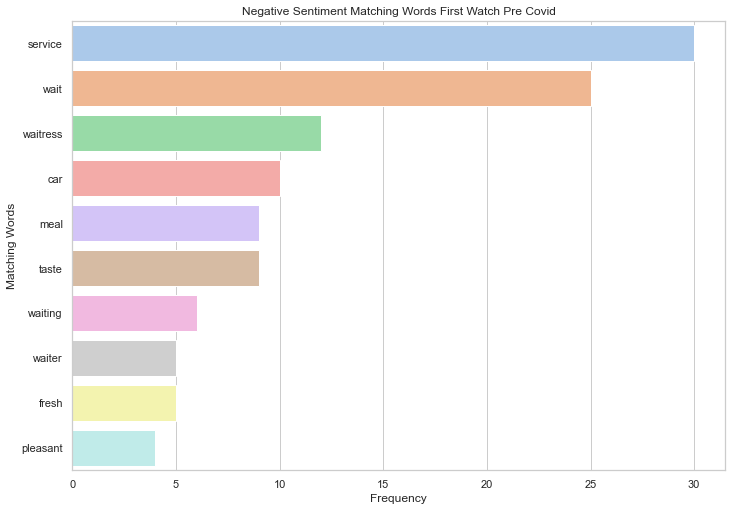

In [100]:
firstwatch_pre_sentiment['Matching_Words'] = firstwatch_pre_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in firstwatch_pre_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words First Watch Pre Covid')

In [101]:
firstwatch_post_sentiment['clean_fsr'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

firstwatch_post_sentiment['clean_restrooms'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

firstwatch_post_sentiment['food_hygiene'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

firstwatch_post_sentiment['food_service'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

firstwatch_post_sentiment['operations'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

firstwatch_post_sentiment['delivery_service'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

firstwatch_post_sentiment['packaging_service'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

firstwatch_post_sentiment['location_and_parking'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

firstwatch_post_sentiment['infrastructure'] = firstwatch_post_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words First Watch Post Covid')]

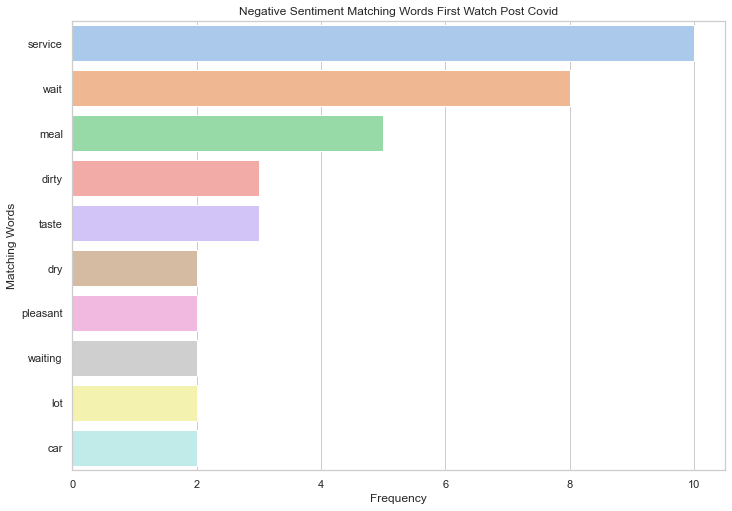

In [102]:
firstwatch_post_sentiment['Matching_Words'] = firstwatch_post_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in firstwatch_post_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words First Watch Post Covid')

In [103]:
print("{} % of Pre Covid Reviews mention Clean FSR for First Watch".format(round(((firstwatch_pre_sentiment['clean_fsr'].sum()/383)*100), 2)))
print("{} % of Pre Covid Reviews mention Clean Restrooms for First Watch".format(round(((firstwatch_pre_sentiment['clean_restrooms'].sum()/383)*100), 2)))

print("{} % of Pre Covid Reviews mention Food Hygiene for First Watch".format(round(((firstwatch_pre_sentiment['food_hygiene'].sum()/383)*100), 2)))
print("{} % of Pre Covid Reviews mention Food Service for First Watch".format(round(((firstwatch_pre_sentiment['food_service'].sum()/383)*100), 2)))

print("{} % of Pre Covid Reviews mention Operations for First Watch".format(round(((firstwatch_pre_sentiment['operations'].sum()/383)*100), 2)))
print("{} % of Pre Covid Reviews mention Delivery Service for First Watch".format(round(((firstwatch_pre_sentiment['delivery_service'].sum()/383)*100), 2)))

print("{} % of Pre Covid Reviews mention Packaging Service for First Watch".format(round(((firstwatch_pre_sentiment['packaging_service'].sum()/383)*100), 2)))
print("{} % of Pre Covid Reviews mention Location & Parking for First Watch".format(round(((firstwatch_pre_sentiment['location_and_parking'].sum()/383)*100), 2)))

print("{} % of Pre Covid Reviews mention Infrastructure for First Watch".format(round(((firstwatch_pre_sentiment['infrastructure'].sum()/383)*100), 2)))

0.52 % of Pre Covid Reviews mention Clean FSR for First Watch
0.26 % of Pre Covid Reviews mention Clean Restrooms for First Watch
3.92 % of Pre Covid Reviews mention Food Hygiene for First Watch
7.83 % of Pre Covid Reviews mention Food Service for First Watch
12.53 % of Pre Covid Reviews mention Operations for First Watch
0.26 % of Pre Covid Reviews mention Delivery Service for First Watch
1.04 % of Pre Covid Reviews mention Packaging Service for First Watch
0.78 % of Pre Covid Reviews mention Location & Parking for First Watch
2.87 % of Pre Covid Reviews mention Infrastructure for First Watch


In [104]:
print("{} Total No of Negative Reviews Pre Covid for First Watch".format(len(firstwatch_pre_sentiment)))

83 Total No of Negative Reviews Pre Covid for First Watch


In [105]:
print("{} % of Post Covid Reviews mention Clean FSR for First Watch".format(round(((firstwatch_post_sentiment['clean_fsr'].sum()/94)*100), 2)))
print("{} % of Post Covid Reviews mention Clean Restrooms for First Watch".format(round(((firstwatch_post_sentiment['clean_restrooms'].sum()/94)*100), 2)))

print("{} % of Post Covid Reviews mention Food Hygiene for First Watch".format(round(((firstwatch_post_sentiment['food_hygiene'].sum()/94)*100), 2)))
print("{} % of Post Covid Reviews mention Food Service for First Watch".format(round(((firstwatch_post_sentiment['food_service'].sum()/94)*100), 2)))

print("{} % of Post Covid Reviews mention Operations for First Watch".format(round(((firstwatch_post_sentiment['operations'].sum()/94)*100), 2)))
print("{} % of Post Covid Reviews mention Delivery Service for First Watch".format(round(((firstwatch_post_sentiment['delivery_service'].sum()/94)*100), 2)))

print("{} % of Post Covid Reviews mention Packaging Service for First Watch".format(round(((firstwatch_post_sentiment['packaging_service'].sum()/94)*100), 2)))
print("{} % of Post Covid Reviews mention Location & Parking for First Watch".format(round(((firstwatch_post_sentiment['location_and_parking'].sum()/94)*100), 2)))

print("{} % of Post Covid Reviews mention Infrastructure for First Watch".format(round(((firstwatch_post_sentiment['infrastructure'].sum()/94)*100), 2)))

1.06 % of Post Covid Reviews mention Clean FSR for First Watch
0.0 % of Post Covid Reviews mention Clean Restrooms for First Watch
7.45 % of Post Covid Reviews mention Food Hygiene for First Watch
8.51 % of Post Covid Reviews mention Food Service for First Watch
17.02 % of Post Covid Reviews mention Operations for First Watch
1.06 % of Post Covid Reviews mention Delivery Service for First Watch
2.13 % of Post Covid Reviews mention Packaging Service for First Watch
2.13 % of Post Covid Reviews mention Location & Parking for First Watch
3.19 % of Post Covid Reviews mention Infrastructure for First Watch


In [106]:
print("{} Total No of Negative Reviews Post Covid for First Watch".format(len(firstwatch_post_sentiment)))

29 Total No of Negative Reviews Post Covid for First Watch


In [107]:
firstwatch_post_sentiment.to_csv('FirstWatchPost.csv')

## Modern Market 

In [108]:
print(modernmarket_pre_sentiment.shape)
print(modernmarket_post_sentiment.shape)

(426, 5)
(73, 5)


In [109]:
modernmarket_pre_sentiment = modernmarket_pre_sentiment[modernmarket_pre_sentiment.Sentiment_Type=='Negative']
modernmarket_pre_sentiment.reset_index(drop=True, inplace=True)

modernmarket_post_sentiment = modernmarket_post_sentiment[modernmarket_post_sentiment.Sentiment_Type=='Negative']
modernmarket_post_sentiment.reset_index(drop=True, inplace=True)

In [110]:
modernmarket_pre_sentiment.to_csv('Modern_Market_Pre.csv')
modernmarket_post_sentiment.to_csv('Modern_Market_Post.csv')

In [111]:
modernmarket_pre_sentiment['clean_fsr'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

modernmarket_pre_sentiment['clean_restrooms'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

modernmarket_pre_sentiment['food_hygiene'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

modernmarket_pre_sentiment['food_service'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

modernmarket_pre_sentiment['operations'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

modernmarket_pre_sentiment['delivery_service'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

modernmarket_pre_sentiment['packaging_service'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

modernmarket_pre_sentiment['location_and_parking'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

modernmarket_pre_sentiment['infrastructure'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words Modern Market Pre Covid')]

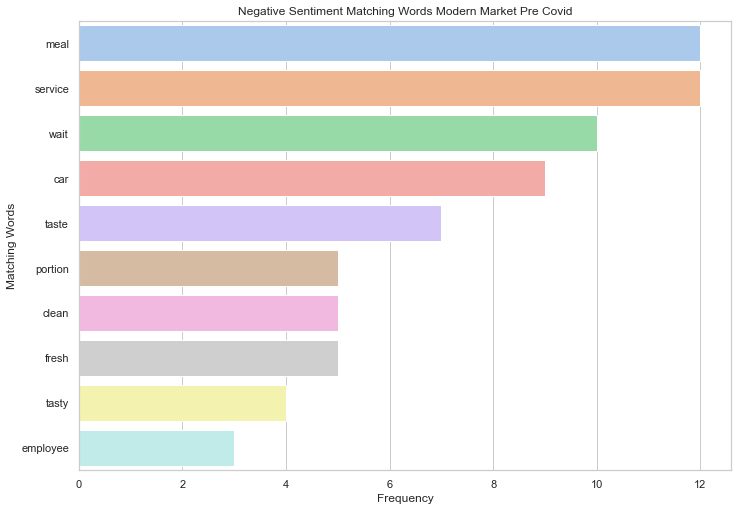

In [112]:
modernmarket_pre_sentiment['Matching_Words'] = modernmarket_pre_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in modernmarket_pre_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words Modern Market Pre Covid')

In [113]:
modernmarket_post_sentiment['clean_fsr'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

modernmarket_post_sentiment['clean_restrooms'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

modernmarket_post_sentiment['food_hygiene'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

modernmarket_post_sentiment['food_service'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

modernmarket_post_sentiment['operations'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

modernmarket_post_sentiment['delivery_service'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

modernmarket_post_sentiment['packaging_service'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

modernmarket_post_sentiment['location_and_parking'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

modernmarket_post_sentiment['infrastructure'] = modernmarket_post_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words Modern Market Post Covid')]

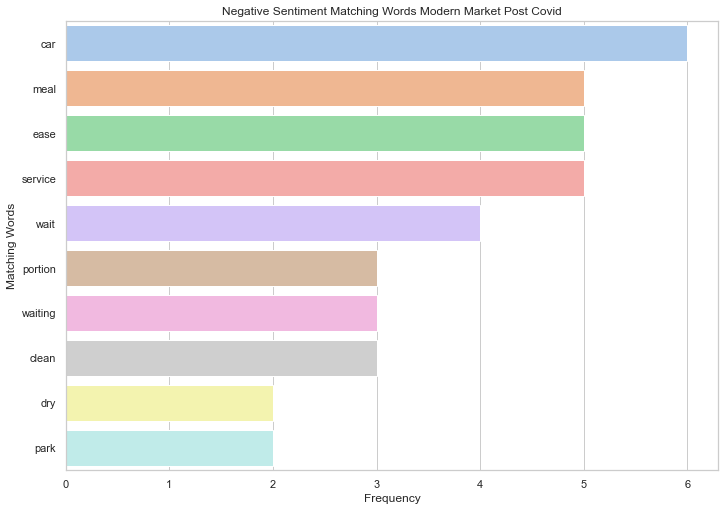

In [114]:
modernmarket_post_sentiment['Matching_Words'] = modernmarket_post_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in modernmarket_post_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words Modern Market Post Covid')

In [115]:
print("{} % of Pre Covid Reviews mention Clean FSR for Modern Market".format(round(((modernmarket_pre_sentiment['clean_fsr'].sum()/426)*100), 2)))
print("{} % of Pre Covid Reviews mention Clean Restrooms for Modern Market".format(round(((modernmarket_pre_sentiment['clean_restrooms'].sum()/426)*100), 2)))

print("{} % of Pre Covid Reviews mention Food Hygiene for Modern Market".format(round(((modernmarket_pre_sentiment['food_hygiene'].sum()/426)*100), 2)))
print("{} % of Pre Covid Reviews mention Food Service for Modern Market".format(round(((modernmarket_pre_sentiment['food_service'].sum()/426)*100), 2)))

print("{} % of Pre Covid Reviews mention Operations for Modern Market".format(round(((modernmarket_pre_sentiment['operations'].sum()/426)*100), 2)))
print("{} % of Pre Covid Reviews mention Delivery Service for Modern Market".format(round(((modernmarket_pre_sentiment['delivery_service'].sum()/426)*100), 2)))

print("{} % of Pre Covid Reviews mention Packaging Service for Modern Market".format(round(((modernmarket_pre_sentiment['packaging_service'].sum()/426)*100), 2)))
print("{} % of Pre Covid Reviews mention Location & Parking for Modern Market".format(round(((modernmarket_pre_sentiment['location_and_parking'].sum()/426)*100), 2)))

print("{} % of Pre Covid Reviews mention Infrastructure for Modern Market".format(round(((modernmarket_pre_sentiment['infrastructure'].sum()/426)*100), 2)))

1.17 % of Pre Covid Reviews mention Clean FSR for Modern Market
0.0 % of Pre Covid Reviews mention Clean Restrooms for Modern Market
2.58 % of Pre Covid Reviews mention Food Hygiene for Modern Market
5.16 % of Pre Covid Reviews mention Food Service for Modern Market
5.87 % of Pre Covid Reviews mention Operations for Modern Market
0.47 % of Pre Covid Reviews mention Delivery Service for Modern Market
0.47 % of Pre Covid Reviews mention Packaging Service for Modern Market
0.94 % of Pre Covid Reviews mention Location & Parking for Modern Market
1.17 % of Pre Covid Reviews mention Infrastructure for Modern Market


In [116]:
print("{} Total No of Negative Reviews Pre Covid for Modern Market".format(len(modernmarket_pre_sentiment)))

75 Total No of Negative Reviews Pre Covid for Modern Market


In [117]:
print("{} % of Post Covid Reviews mention Clean FSR for Modern Market".format(round(((modernmarket_post_sentiment['clean_fsr'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Clean Restrooms for Modern Market".format(round(((modernmarket_post_sentiment['clean_restrooms'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Food Hygiene for Modern Market".format(round(((modernmarket_post_sentiment['food_hygiene'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Food Service for Modern Market".format(round(((modernmarket_post_sentiment['food_service'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Operations for Modern Market".format(round(((modernmarket_post_sentiment['operations'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Delivery Service for Modern Market".format(round(((modernmarket_post_sentiment['delivery_service'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Packaging Service for Modern Market".format(round(((modernmarket_post_sentiment['packaging_service'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Location & Parking for Modern Market".format(round(((modernmarket_post_sentiment['location_and_parking'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Infrastructure for Modern Market".format(round(((modernmarket_post_sentiment['infrastructure'].sum()/73)*100), 2)))

4.11 % of Post Covid Reviews mention Clean FSR for Modern Market
0.0 % of Post Covid Reviews mention Clean Restrooms for Modern Market
9.59 % of Post Covid Reviews mention Food Hygiene for Modern Market
16.44 % of Post Covid Reviews mention Food Service for Modern Market
15.07 % of Post Covid Reviews mention Operations for Modern Market
1.37 % of Post Covid Reviews mention Delivery Service for Modern Market
5.48 % of Post Covid Reviews mention Packaging Service for Modern Market
4.11 % of Post Covid Reviews mention Location & Parking for Modern Market
4.11 % of Post Covid Reviews mention Infrastructure for Modern Market


In [118]:
print("{} Total No of Negative Reviews Post Covid for Modern Market".format(len(modernmarket_post_sentiment)))

26 Total No of Negative Reviews Post Covid for Modern Market


In [119]:
modernmarket_post_sentiment.to_csv('Modern_Market_Post.csv')

## Top Golf 

In [120]:
print(topgolf_pre_sentiment.shape)
print(topgolf_post_sentiment.shape)

(895, 5)
(169, 5)


In [121]:
topgolf_pre_sentiment = topgolf_pre_sentiment[topgolf_pre_sentiment.Sentiment_Type=='Negative']
topgolf_pre_sentiment.reset_index(drop=True, inplace=True)

topgolf_post_sentiment = topgolf_post_sentiment[topgolf_post_sentiment.Sentiment_Type=='Negative']
topgolf_post_sentiment.reset_index(drop=True, inplace=True)

In [122]:
topgolf_pre_sentiment.to_csv('Top_Golf_Pre.csv')
topgolf_pre_sentiment.to_csv('Top_Golf_Post.csv')

In [123]:
topgolf_pre_sentiment['clean_fsr'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

topgolf_pre_sentiment['clean_restrooms'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

topgolf_pre_sentiment['food_hygiene'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

topgolf_pre_sentiment['food_service'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

topgolf_pre_sentiment['operations'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

topgolf_pre_sentiment['delivery_service'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

topgolf_pre_sentiment['packaging_service'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

topgolf_pre_sentiment['location_and_parking'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

topgolf_pre_sentiment['infrastructure'] = topgolf_pre_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

In [124]:
topgolf_post_sentiment['clean_fsr'] = topgolf_post_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

topgolf_post_sentiment['clean_restrooms'] = topgolf_post_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

topgolf_post_sentiment['food_hygiene'] = topgolf_post_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

topgolf_post_sentiment['food_service'] = topgolf_post_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

topgolf_post_sentiment['operations'] = topgolf_post_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

topgolf_post_sentiment['delivery_service'] = topgolf_post_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

topgolf_post_sentiment['packaging_service'] = topgolf_post_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

topgolf_post_sentiment['location_and_parking'] = topgolf_post_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

topgolf_post_sentiment['infrastructure'] = topgolf_post_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words Top Golf Pre Covid')]

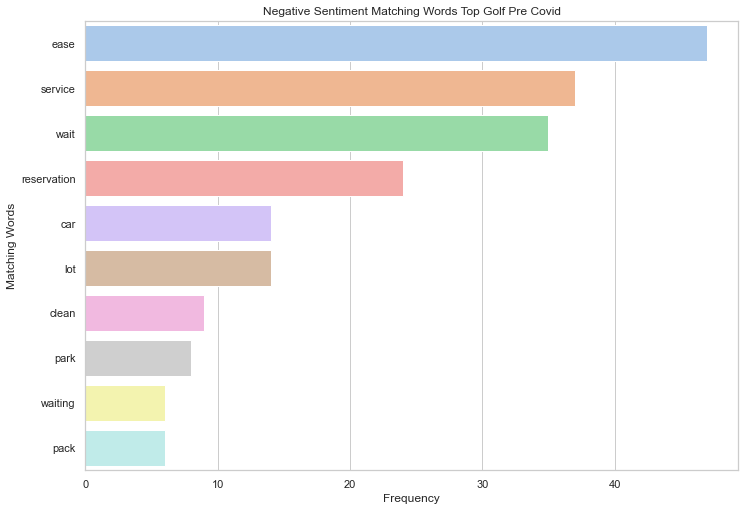

In [125]:
topgolf_pre_sentiment['Matching_Words'] = topgolf_pre_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in topgolf_pre_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words Top Golf Pre Covid')

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words Top Golf Post Covid')]

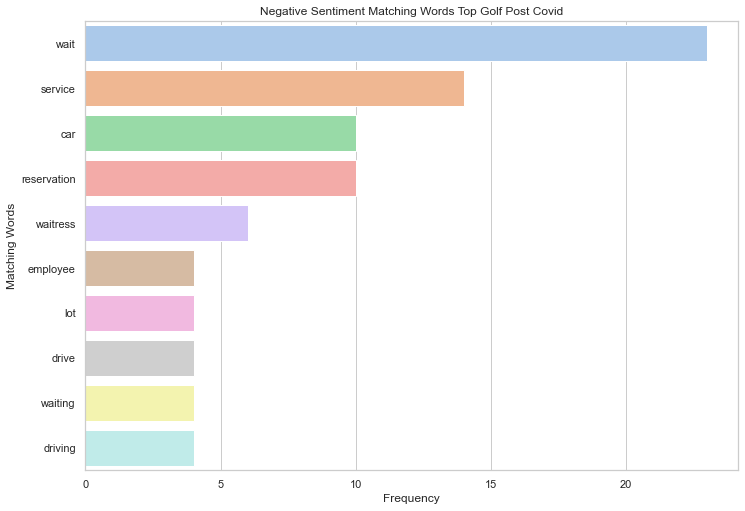

In [126]:
topgolf_post_sentiment['Matching_Words'] = topgolf_post_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in topgolf_post_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words Top Golf Post Covid')

In [127]:
print("{} % of Pre Covid Reviews mention Clean FSR for Top Golf".format(round(((topgolf_pre_sentiment['clean_fsr'].sum()/895)*100), 2)))
print("{} % of Pre Covid Reviews mention Clean Restrooms for Top Golf".format(round(((topgolf_pre_sentiment['clean_restrooms'].sum()/895)*100), 2)))

print("{} % of Pre Covid Reviews mention Food Hygiene for Top Golf".format(round(((topgolf_pre_sentiment['food_hygiene'].sum()/895)*100), 2)))
print("{} % of Pre Covid Reviews mention Food Service for Top Golf".format(round(((topgolf_pre_sentiment['food_service'].sum()/895)*100), 2)))

print("{} % of Pre Covid Reviews mention Operations for Top Golf".format(round(((topgolf_pre_sentiment['operations'].sum()/895)*100), 2)))
print("{} % of Pre Covid Reviews mention Delivery Service for Top Golf".format(round(((topgolf_pre_sentiment['delivery_service'].sum()/895)*100), 2)))

print("{} % of Pre Covid Reviews mention Packaging Service for Top Golf".format(round(((topgolf_pre_sentiment['packaging_service'].sum()/895)*100), 2)))
print("{} % of Pre Covid Reviews mention Location & Parking for Top Golf".format(round(((topgolf_pre_sentiment['location_and_parking'].sum()/895)*100), 2)))

print("{} % of Pre Covid Reviews mention Infrastructure for Top Golf".format(round(((topgolf_pre_sentiment['infrastructure'].sum()/895)*100), 2)))

1.01 % of Pre Covid Reviews mention Clean FSR for Top Golf
0.22 % of Pre Covid Reviews mention Clean Restrooms for Top Golf
0.45 % of Pre Covid Reviews mention Food Hygiene for Top Golf
0.78 % of Pre Covid Reviews mention Food Service for Top Golf
11.84 % of Pre Covid Reviews mention Operations for Top Golf
0.0 % of Pre Covid Reviews mention Delivery Service for Top Golf
1.01 % of Pre Covid Reviews mention Packaging Service for Top Golf
2.57 % of Pre Covid Reviews mention Location & Parking for Top Golf
1.34 % of Pre Covid Reviews mention Infrastructure for Top Golf


In [128]:
print("{} Total No of Negative Reviews Pre Covid for Top Golf".format(len(topgolf_pre_sentiment)))

178 Total No of Negative Reviews Pre Covid for Top Golf


In [129]:
print("{} % of Post Covid Reviews mention Clean FSR for Top Golf".format(round(((topgolf_post_sentiment['clean_fsr'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Clean Restrooms for Top Golf".format(round(((topgolf_post_sentiment['clean_restrooms'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Food Hygiene for Top Golf".format(round(((topgolf_post_sentiment['food_hygiene'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Food Service for Top Golf".format(round(((topgolf_post_sentiment['food_service'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Operations for Top Golf".format(round(((topgolf_post_sentiment['operations'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Delivery Service for Top Golf".format(round(((topgolf_post_sentiment['delivery_service'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Packaging Service for Top Golf".format(round(((topgolf_post_sentiment['packaging_service'].sum()/73)*100), 2)))
print("{} % of Post Covid Reviews mention Location & Parking for Top Golf".format(round(((topgolf_post_sentiment['location_and_parking'].sum()/73)*100), 2)))

print("{} % of Post Covid Reviews mention Infrastructure for Top Golf".format(round(((topgolf_post_sentiment['infrastructure'].sum()/73)*100), 2)))

4.11 % of Post Covid Reviews mention Clean FSR for Top Golf
1.37 % of Post Covid Reviews mention Clean Restrooms for Top Golf
6.85 % of Post Covid Reviews mention Food Hygiene for Top Golf
12.33 % of Post Covid Reviews mention Food Service for Top Golf
47.95 % of Post Covid Reviews mention Operations for Top Golf
2.74 % of Post Covid Reviews mention Delivery Service for Top Golf
0.0 % of Post Covid Reviews mention Packaging Service for Top Golf
15.07 % of Post Covid Reviews mention Location & Parking for Top Golf
8.22 % of Post Covid Reviews mention Infrastructure for Top Golf


In [130]:
print("{} Total No of Negative Reviews Post Covid for Top Golf".format(len(topgolf_post_sentiment)))

50 Total No of Negative Reviews Post Covid for Top Golf


In [131]:
topgolf_post_sentiment.to_csv('Topgolf_post.csv')

## True Food Kitchen

In [132]:
print(truefoodkitchen_pre_sentiment.shape)
print(truefoodkitchen_post_sentiment.shape)

(10349, 5)
(12586, 5)


In [133]:
truefoodkitchen_pre_sentiment = truefoodkitchen_pre_sentiment[truefoodkitchen_pre_sentiment.Sentiment_Type=='Negative']
truefoodkitchen_pre_sentiment.reset_index(drop=True, inplace=True)

truefoodkitchen_post_sentiment = truefoodkitchen_post_sentiment[truefoodkitchen_post_sentiment.Sentiment_Type=='Negative']
truefoodkitchen_post_sentiment.reset_index(drop=True, inplace=True)

In [134]:
# truefoodkitchen_pre_sentiment.to_csv('TrueFoodKitchen_Pre.csv')

In [135]:
truefoodkitchen_pre_sentiment['clean_fsr'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['clean_restrooms'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['food_hygiene'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['food_service'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['operations'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['delivery_service'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['packaging_service'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['location_and_parking'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

truefoodkitchen_pre_sentiment['infrastructure'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

In [136]:
truefoodkitchen_post_sentiment['clean_fsr'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['clean_restrooms'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['food_hygiene'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['food_service'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['operations'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['delivery_service'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['packaging_service'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['location_and_parking'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

truefoodkitchen_post_sentiment['infrastructure'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words True Food Kitchen Pre Covid')]

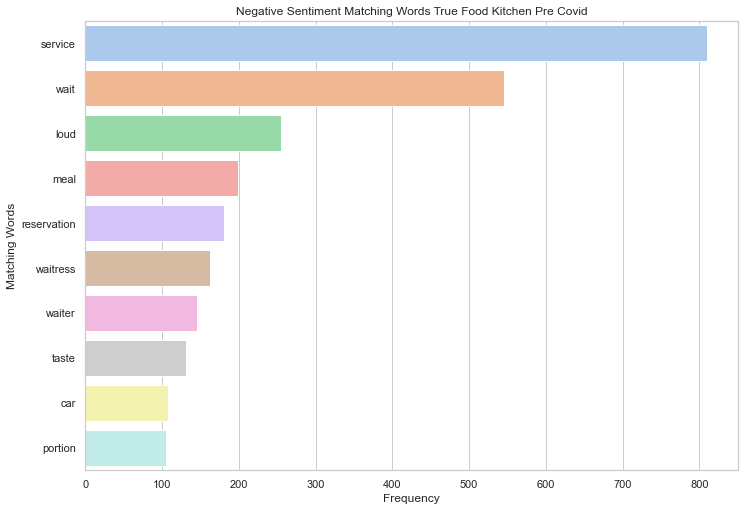

In [137]:
truefoodkitchen_pre_sentiment['Matching_Words'] = truefoodkitchen_pre_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in truefoodkitchen_pre_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words True Food Kitchen Pre Covid')

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words True Food Kitchen Post Covid')]

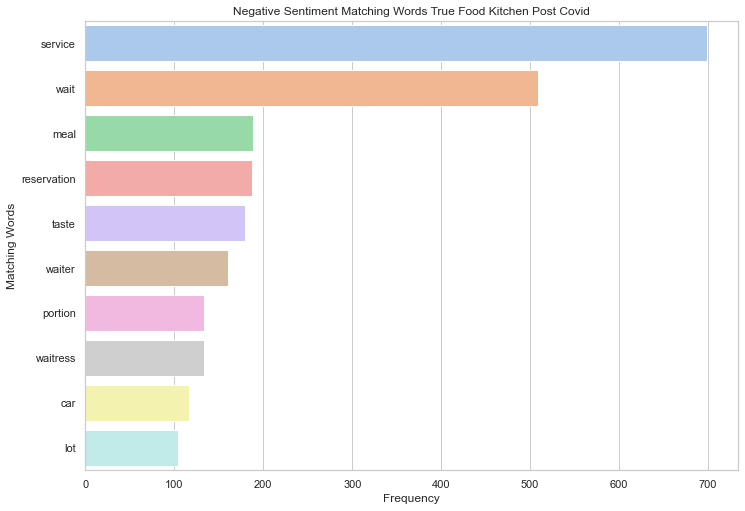

In [138]:
truefoodkitchen_post_sentiment['Matching_Words'] = truefoodkitchen_post_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in truefoodkitchen_post_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words True Food Kitchen Post Covid')

In [139]:
print("{} % of Pre Covid Reviews mention Clean FSR for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['clean_fsr'].sum()/10349)*100), 2)))
print("{} % of Pre Covid Reviews mention Clean Restrooms for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['clean_restrooms'].sum()/10349)*100), 2)))

print("{} % of Pre Covid Reviews mention Food Hygiene for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['food_hygiene'].sum()/10349)*100), 2)))
print("{} % of Pre Covid Reviews mention Food Service for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['food_service'].sum()/10349)*100), 2)))

print("{} % of Pre Covid Reviews mention Operations for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['operations'].sum()/10349)*100), 2)))
print("{} % of Pre Covid Reviews mention Delivery Service for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['delivery_service'].sum()/10349)*100), 2)))

print("{} % of Pre Covid Reviews mention Packaging Service for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['packaging_service'].sum()/10349)*100), 2)))
print("{} % of Pre Covid Reviews mention Location & Parking for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['location_and_parking'].sum()/10349)*100), 2)))

print("{} % of Pre Covid Reviews mention Infrastructure for True Food Kitchen".format(round(((truefoodkitchen_pre_sentiment['infrastructure'].sum()/10349)*100), 2)))

0.41 % of Pre Covid Reviews mention Clean FSR for True Food Kitchen
0.14 % of Pre Covid Reviews mention Clean Restrooms for True Food Kitchen
2.37 % of Pre Covid Reviews mention Food Hygiene for True Food Kitchen
5.99 % of Pre Covid Reviews mention Food Service for True Food Kitchen
13.17 % of Pre Covid Reviews mention Operations for True Food Kitchen
0.5 % of Pre Covid Reviews mention Delivery Service for True Food Kitchen
0.53 % of Pre Covid Reviews mention Packaging Service for True Food Kitchen
1.18 % of Pre Covid Reviews mention Location & Parking for True Food Kitchen
1.85 % of Pre Covid Reviews mention Infrastructure for True Food Kitchen


In [140]:
print("{} Total No of Negative Reviews Pre Covid for True Food Kitchen".format(len(truefoodkitchen_pre_sentiment)))

2305 Total No of Negative Reviews Pre Covid for True Food Kitchen


In [141]:
print("{} % of Post Covid Reviews mention Clean FSR for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['clean_fsr'].sum()/12586)*100), 2)))
print("{} % of Post Covid Reviews mention Clean Restrooms for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['clean_restrooms'].sum()/12586)*100), 2)))

print("{} % of Post Covid Reviews mention Food Hygiene for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['food_hygiene'].sum()/12586)*100), 2)))
print("{} % of Post Covid Reviews mention Food Service for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['food_service'].sum()/12586)*100), 2)))

print("{} % of Post Covid Reviews mention Operations for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['operations'].sum()/12586)*100), 2)))
print("{} % of Post Covid Reviews mention Delivery Service for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['delivery_service'].sum()/12586)*100), 2)))

print("{} % of Post Covid Reviews mention Packaging Service for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['packaging_service'].sum()/12586)*100), 2)))
print("{} % of Post Covid Reviews mention Location & Parking for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['location_and_parking'].sum()/12586)*100), 2)))

print("{} % of Post Covid Reviews mention Infrastructure for True Food Kitchen".format(round(((truefoodkitchen_post_sentiment['infrastructure'].sum()/12586)*100), 2)))

0.53 % of Post Covid Reviews mention Clean FSR for True Food Kitchen
0.17 % of Post Covid Reviews mention Clean Restrooms for True Food Kitchen
2.55 % of Post Covid Reviews mention Food Hygiene for True Food Kitchen
5.5 % of Post Covid Reviews mention Food Service for True Food Kitchen
9.45 % of Post Covid Reviews mention Operations for True Food Kitchen
0.52 % of Post Covid Reviews mention Delivery Service for True Food Kitchen
0.49 % of Post Covid Reviews mention Packaging Service for True Food Kitchen
1.21 % of Post Covid Reviews mention Location & Parking for True Food Kitchen
2.42 % of Post Covid Reviews mention Infrastructure for True Food Kitchen


In [142]:
print("{} Total No of Negative Reviews Post Covid for True Food Kitchen".format(len(truefoodkitchen_post_sentiment)))

2495 Total No of Negative Reviews Post Covid for True Food Kitchen


In [154]:
truefoodkitchen_post_sentiment.to_csv('TrueFoodKitchen_Post.csv')

## Texas Roadhouse

In [143]:
print(texasroadhouse_pre_sentiment.shape)
print(texasroadhouse_post_sentiment.shape)

(1231, 5)
(336, 5)


In [144]:
texasroadhouse_pre_sentiment = texasroadhouse_pre_sentiment[texasroadhouse_pre_sentiment.Sentiment_Type=='Negative']
texasroadhouse_pre_sentiment.reset_index(drop=True, inplace=True)

texasroadhouse_post_sentiment = texasroadhouse_post_sentiment[texasroadhouse_post_sentiment.Sentiment_Type=='Negative']
texasroadhouse_post_sentiment.reset_index(drop=True, inplace=True)

In [145]:
texasroadhouse_pre_sentiment.to_csv('Texas_Roadhouse_Post.csv')

In [146]:
texasroadhouse_pre_sentiment['clean_fsr'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['clean_restrooms'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['food_hygiene'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['food_service'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['operations'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['delivery_service'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['packaging_service'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['location_and_parking'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

texasroadhouse_pre_sentiment['infrastructure'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

In [147]:
texasroadhouse_post_sentiment['clean_fsr'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['clean_restrooms'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['food_hygiene'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['food_service'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['operations'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['delivery_service'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['packaging_service'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['location_and_parking'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

texasroadhouse_post_sentiment['infrastructure'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words Texas Roadhouse Pre Covid')]

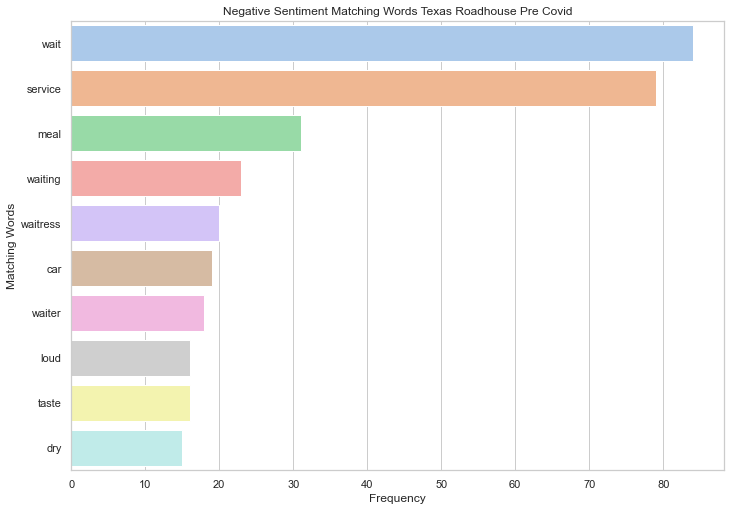

In [148]:
texasroadhouse_pre_sentiment['Matching_Words'] = texasroadhouse_pre_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in texasroadhouse_pre_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words Texas Roadhouse Pre Covid')

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Matching Words'),
 Text(0.5, 1.0, 'Negative Sentiment Matching Words Texas Roadhouse Post Covid')]

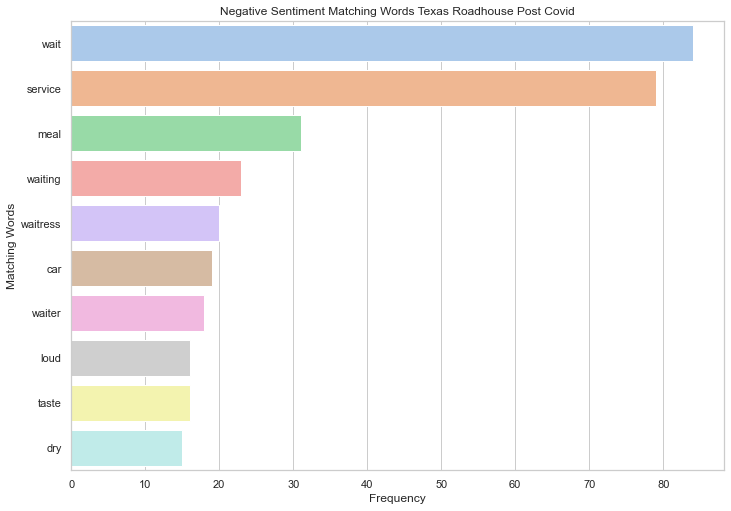

In [149]:
texasroadhouse_post_sentiment['Matching_Words'] = texasroadhouse_post_sentiment.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

matching_words = []

for index, rows in texasroadhouse_pre_sentiment.iterrows():
    my_list = [rows.Matching_Words]
    
    matching_words.append(my_list)
    
merged = list(itertools.chain.from_iterable(matching_words))
merged2 = list(itertools.chain.from_iterable(merged))
counts = Counter(merged2)
# print(counts)


df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.sort_values([0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.head(10)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid", color_codes=True)

ax = sns.barplot(x=0, y="index", data=df, palette = sns.color_palette("pastel"))
ax.set(xlabel='Frequency', ylabel='Matching Words', title = 'Negative Sentiment Matching Words Texas Roadhouse Post Covid')

In [150]:
print("{} % of Pre Covid Reviews mention Clean FSR for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['clean_fsr'].sum()/1231)*100), 2)))
print("{} % of Pre Covid Reviews mention Clean Restrooms for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['clean_restrooms'].sum()/1231)*100), 2)))

print("{} % of Pre Covid Reviews mention Food Hygiene for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['food_hygiene'].sum()/1231)*100), 2)))
print("{} % of Pre Covid Reviews mention Food Service for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['food_service'].sum()/1231)*100), 2)))

print("{} % of Pre Covid Reviews mention Operations for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['operations'].sum()/1231)*100), 2)))
print("{} % of Pre Covid Reviews mention Delivery Service for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['delivery_service'].sum()/1231)*100), 2)))

print("{} % of Pre Covid Reviews mention Packaging Service for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['packaging_service'].sum()/1231)*100), 2)))
print("{} % of Pre Covid Reviews mention Location & Parking for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['location_and_parking'].sum()/1231)*100), 2)))

print("{} % of Pre Covid Reviews mention Infrastructure for Texas Roadhouse".format(round(((texasroadhouse_pre_sentiment['infrastructure'].sum()/1231)*100), 2)))

0.41 % of Pre Covid Reviews mention Clean FSR for Texas Roadhouse
0.41 % of Pre Covid Reviews mention Clean Restrooms for Texas Roadhouse
3.82 % of Pre Covid Reviews mention Food Hygiene for Texas Roadhouse
4.71 % of Pre Covid Reviews mention Food Service for Texas Roadhouse
11.54 % of Pre Covid Reviews mention Operations for Texas Roadhouse
0.73 % of Pre Covid Reviews mention Delivery Service for Texas Roadhouse
0.81 % of Pre Covid Reviews mention Packaging Service for Texas Roadhouse
1.06 % of Pre Covid Reviews mention Location & Parking for Texas Roadhouse
2.92 % of Pre Covid Reviews mention Infrastructure for Texas Roadhouse


In [151]:
print("{} Total No of Negative Reviews Pre Covid for Texas Road House".format(len(texasroadhouse_pre_sentiment)))

285 Total No of Negative Reviews Pre Covid for Texas Road House


In [152]:
print("{} % of Post Covid Reviews mention Clean FSR for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['clean_fsr'].sum()/336)*100), 2)))
print("{} % of Post Covid Reviews mention Clean Restrooms for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['clean_restrooms'].sum()/336)*100), 2)))

print("{} % of Post Covid Reviews mention Food Hygiene for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['food_hygiene'].sum()/336)*100), 2)))
print("{} % of Post Covid Reviews mention Food Service for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['food_service'].sum()/336)*100), 2)))

print("{} % of Post Covid Reviews mention Operations for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['operations'].sum()/336)*100), 2)))
print("{} % of Post Covid Reviews mention Delivery Service for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['delivery_service'].sum()/336)*100), 2)))

print("{} % of Post Covid Reviews mention Packaging Service for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['packaging_service'].sum()/336)*100), 2)))
print("{} % of Post Covid Reviews mention Location & Parking for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['location_and_parking'].sum()/336)*100), 2)))

print("{} % of Post Covid Reviews mention Infrastructure for Texas Roadhouse".format(round(((texasroadhouse_post_sentiment['infrastructure'].sum()/336)*100), 2)))

1.19 % of Post Covid Reviews mention Clean FSR for Texas Roadhouse
0.0 % of Post Covid Reviews mention Clean Restrooms for Texas Roadhouse
4.76 % of Post Covid Reviews mention Food Hygiene for Texas Roadhouse
8.04 % of Post Covid Reviews mention Food Service for Texas Roadhouse
15.48 % of Post Covid Reviews mention Operations for Texas Roadhouse
1.49 % of Post Covid Reviews mention Delivery Service for Texas Roadhouse
2.38 % of Post Covid Reviews mention Packaging Service for Texas Roadhouse
3.87 % of Post Covid Reviews mention Location & Parking for Texas Roadhouse
4.46 % of Post Covid Reviews mention Infrastructure for Texas Roadhouse


In [153]:
print("{} Total No of Negative Reviews Post Covid for Texas Road House".format(len(texasroadhouse_post_sentiment)))

82 Total No of Negative Reviews Post Covid for Texas Road House


## Overall Negative Reviews

In [ ]:
neg_reviews_pre = pd.concat([firstwatch_pre_sentiment, modernmarket_pre_sentiment, topgolf_pre_sentiment, truefoodkitchen_pre_sentiment, texasroadhouse_pre_sentiment], ignore_index=True, sort=False)
neg_reviews_pre.reset_index(drop=True, inplace=True)
print(neg_reviews_pre.shape)

In [ ]:
neg_reviews_pre.to_csv('negative_pre.csv')

In [ ]:
neg_reviews_pre = neg_reviews_pre.loc[:, ~neg_reviews_pre.columns.str.contains('^Unnamed')]

In [ ]:
words = ['antiseptic', 'immaculate', 'pristine', 'spotless', 'squeaky-clean',
             'stainless', 'unsoiled', 'clean', 'washed', 'scrubbed', 'cleansed', 'cleaned', 'polished',
             'spotless', 'unspotted', 'unblemished', 'immaculate', 'grubby', 'smirched', 'soiled',
             'spotted', 'stained', 'sullied', 'unclean', 'uncleaned''bathrooms', 'baths',
         'restroom', 'johns', 'lavatories', 'loos', 'toilets',
                   'washrooms', 'waterclosets', 'wc', 'unhealthy' 'freshness', 'safe', 'fresh', 'hygiene', 'hygienic',
                'sanitary', 'sterile', 'tidy', 'pure', 'contaminated', 'dirty',
                'germ-free', 'stale', 'musty', 'bacteria', 'germs', 'variety', 'taste', 'presentation',
         'portion', 'subpar', 'soggy', 'pleasant',
                'exceptional', 'responsive', 'nutritious', 'tasty', 'wait', 'checkout',
         'checkin', 'ease', 'easy', 'professionalism',
              'waiter', 'waitress', 'employee', 'service', 'reservation', 'deliver',
         'delivery', 'pickup', 'predictability', 'estimate', 'to-go',
                    'togo', 'onlineorder', 'online-order' 'ubereats', 'doordash', 'seamless', 'grubhub',
         'packaging', 'package', 'box', 'packing', 'visual',
                     'spill', 'container', 'presentation', 'pack', 'parcel', 'leak',
         'drive', 'drivetime', 'drive-time', 'parking', 'lot', 'valet', 'park',
                        'picture', 'driving', 'valet', 'traffic', 'curbside', 'vehicle',
         'waiting', 'outdoor', 'indoor', 'patio', 'reservation-facility', 'reservationfacility', 'buffet', 
                  'atmosphere', 'vibe', 'spacious', 'distancing', 'seating']


In [ ]:
def search_keywords_add(list_of_words, x):
    counter = []
    for i in list_of_words:
        if(x.lower().find(i) != -1):
            counter.append(i)
    return counter  

neg_reviews_pre['Matching_Words'] = neg_reviews_pre.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

In [ ]:
neg_reviews_pre['Matching_Words'] = neg_reviews_pre.apply(lambda x: search_keywords_add(words, x['Reviews']), axis=1)

In [ ]:
neg_reviews_pre.to_csv('Negative_Sentiment_Combined.csv')

In [ ]:
neg_reviews_post = pd.concat([firstwatch_post_sentiment, modernmarket_post_sentiment, topgolf_post_sentiment, truefoodkitchen_post_sentiment, texasroadhouse_post_sentiment], ignore_index=True, sort=False)
neg_reviews_post.reset_index(drop=True, inplace=True)
print(neg_reviews_post.shape)

In [ ]:
neg_reviews_pre = neg_reviews_pre[neg_reviews_pre.Sentiment_Type=='Negative']
neg_reviews_pre.reset_index(drop=True, inplace=True)

In [ ]:
neg_reviews_post = neg_reviews_post[neg_reviews_post.Sentiment_Type=='Negative']
neg_reviews_post.reset_index(drop=True, inplace=True)

In [ ]:
neg_reviews_pre['clean_fsr'] = neg_reviews_pre.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

neg_reviews_pre['clean_restrooms'] = neg_reviews_pre.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

neg_reviews_pre['food_hygiene'] = neg_reviews_pre.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

neg_reviews_pre['food_service'] = neg_reviews_pre.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

neg_reviews_pre['operations'] = neg_reviews_pre.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

neg_reviews_pre['delivery_service'] = neg_reviews_pre.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

neg_reviews_pre['packaging_service'] = neg_reviews_pre.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

neg_reviews_pre['location_and_parking'] = neg_reviews_pre.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

neg_reviews_pre['infrastructure'] = neg_reviews_pre.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

In [ ]:
neg_reviews_post['clean_fsr'] = neg_reviews_post.apply(lambda x: search_keywords(clean_fsr, x['Reviews']), axis=1)

neg_reviews_post['clean_restrooms'] = neg_reviews_post.apply(lambda x: search_keywords(clean_restrooms, x['Reviews']), axis=1)

neg_reviews_post['food_hygiene'] = neg_reviews_post.apply(lambda x: search_keywords(food_hygiene, x['Reviews']), axis=1)

neg_reviews_post['food_service'] = neg_reviews_post.apply(lambda x: search_keywords(food_service, x['Reviews']), axis=1)

neg_reviews_post['operations'] = neg_reviews_post.apply(lambda x: search_keywords(operations, x['Reviews']), axis=1)

neg_reviews_post['delivery_service'] = neg_reviews_post.apply(lambda x: search_keywords(delivery_service, x['Reviews']), axis=1)

neg_reviews_post['packaging_service'] = neg_reviews_post.apply(lambda x: search_keywords(packaging_service, x['Reviews']), axis=1)

neg_reviews_post['location_and_parking'] = neg_reviews_post.apply(lambda x: search_keywords(location_and_parking, x['Reviews']), axis=1)

neg_reviews_post['infrastructure'] = neg_reviews_post.apply(lambda x: search_keywords(infrastructure, x['Reviews']), axis=1)

In [ ]:
print("{} % of Reviews mention Clean FSR".format(round((neg_reviews_pre['clean_fsr'].sum()/len(neg_reviews_pre)*100), 2)))
print("{} % of Reviews mention Clean Restrooms".format(round((neg_reviews_pre['clean_restrooms'].sum()/len(neg_reviews_pre)*100), 2)))

print("{} % of Reviews mention Food Hygiene".format(round((neg_reviews_pre['food_hygiene'].sum()/len(neg_reviews_pre)*100), 2)))
print("{} % of Reviews mention Food Service".format(round((neg_reviews_pre['food_service'].sum()/len(neg_reviews_pre)*100), 2)))

print("{} % of Reviews mention Operations".format(round((neg_reviews_pre['operations'].sum()/len(neg_reviews_pre)*100), 2)))
print("{} % of Reviews mention Delivery Service".format(round((neg_reviews_pre['delivery_service'].sum()/len(neg_reviews_pre)*100), 2)))

print("{} % of Reviews mention Packaging Service".format(round((neg_reviews_pre['packaging_service'].sum()/len(neg_reviews_pre)*100), 2)))
print("{} % of Reviews mention Location & Parking".format(round((neg_reviews_pre['location_and_parking'].sum()/len(neg_reviews_pre)*100), 2)))

print("{} % of Reviews mention Infrastructure".format(round((neg_reviews_pre['infrastructure'].sum()/len(neg_reviews_pre)*100), 2)))

In [ ]:
print("{} % of Reviews mention Clean FSR".format(round((neg_reviews_post['clean_fsr'].sum()/len(neg_reviews_post)*100), 2)))
print("{} % of Reviews mention Clean Restrooms".format(round((neg_reviews_post['clean_restrooms'].sum()/len(neg_reviews_post)*100), 2)))

print("{} % of Reviews mention Food Hygiene".format(round((neg_reviews_post['food_hygiene'].sum()/len(neg_reviews_post)*100), 2)))
print("{} % of Reviews mention Food Service".format(round((neg_reviews_post['food_service'].sum()/len(neg_reviews_post)*100), 2)))

print("{} % of Reviews mention Operations".format(round((neg_reviews_post['operations'].sum()/len(neg_reviews_post)*100), 2)))
print("{} % of Reviews mention Delivery Service".format(round((neg_reviews_post['delivery_service'].sum()/len(neg_reviews_post)*100), 2)))

print("{} % of Reviews mention Packaging Service".format(round((neg_reviews_post['packaging_service'].sum()/len(neg_reviews_post)*100), 2)))
print("{} % of Reviews mention Location & Parking".format(round((neg_reviews_post['location_and_parking'].sum()/len(neg_reviews_post)*100), 2)))

print("{} % of Reviews mention Infrastructure".format(round((neg_reviews_post['infrastructure'].sum()/len(neg_reviews_post)*100), 2)))